# Exercise 1: Python and sounds

This exercise aims to get familiar with some basic audio operations using Python. There are four parts to it: 1) Reading an audio file, 2) Basic operations with audio, 3) Python array indexing, and 4) Downsampling audio - Changing the sampling rate. 

Before doing the exercise, please go through the general information for all the exercises given in `README.txt` of the `exercises` directory. 

### Relevant concepts

__Python:__ Python is a powerful and easy to learn programming language, which is used in a wide variety of application areas. More information in https://www.python.org/. We will use python in all the exercises and in this first one you will start learning about it by performing some basic operations with sound files. 

__Jupyter notebooks:__ Jupiter notebooks are interactive documents containing live code, equations, visualizations and narrative text. More information in https://jupyter.org/. It supports Python and all the exercises here use it.

__Wav file:__ The wav file format is a lossless format to store sounds on a hard drive. Each audio sample is stored as a 16 bit integer number (sometimes also as 24 bit integer or 32 bit float). In this course we will work with only one type of audio files. All the sound files we use in the assignments should be wav files that are mono (one channel), in which the samples are stored in 16 bits, and that use (most of the time) the sampling rate of 44100 Hz. Once read into python, the samples will be converted to floating point values with a range from -1 to 1, resulting in a one-dimensional array of floating point values.

## Part 1 - Reading in an audio file
Complete the `read_audio` function that should read an audio file and return 10 consecutive samples of the file starting from the 50001th sample. This means that the output should exactly contain the 50001th sample to the 50010th sample (10 samples). 

The input to the function is the file name (including the path) and the output should be a numpy array containing 10 samples.

If you use the `wavread` function from the `utilFunctions` module available in the `software/models` directory, the input samples will be automatically converted to a numpy array of floating point numbers with a range from -1 to 1, which is what we want. 

Remember that in python, the index of the first sample of an array is 0 and not 1.

In [1]:
import sys
import os
import numpy as np

sys.path.append('../software/models/')
from utilFunctions import wavread, wavwrite

In [2]:
def read_audio(input_file):
    """
    Input:
        input_file: the path to the wav file      
    Output:
        returns a numpy array containing 10 samples of the audio file
    """
    ## Your code here
    _,y = wavread(input_file)
    return y[50000:50010]


Now call and test the `read_audio` function. You can use as input the sound files from the sounds directory, thus using a relative path to it. If you run your code using the `piano.wav` sound file as input, the function should return the following 10 samples:
```
array([-0.06213569, -0.04541154, -0.02734458, -0.0093997 ,  0.00769066,	0.02319407,  0.03503525, 0.04309214, 0.04626606,  0.0441908], dtype=float32)
```

In [3]:
# call read_audio
### Your code here
read_audio('../sounds/piano.wav')

array([-0.06213569, -0.04541154, -0.02734458, -0.0093997 ,  0.00769066,
        0.02319407,  0.03503525,  0.04309214,  0.04626606,  0.0441908 ],
      dtype=float32)

## Part 2 - Basic operations with audio

Complete the function `minMaxAudio` to be able to read an audio file and return the minimum and  maximum values of the audio samples in that file. The input to the function is the wav file name (including the path) and the output should be two floating point values returned as a tuple.

In [4]:
def min_max_audio(input_file):
    """
    Input:
        inputFile: file name of the wav file (including path)
    Output:
        Tuple with the minimum and the maximum value of the audio samples, like: (min_val, max_val)
    """
    ## Your code here
    _,y = wavread(input_file)
    return min(y),max(y)

Now run and test `min_max_audio`. If you run it using `oboe-A4.wav` as input, it should return the following output: 

```
(-0.83486432, 0.56501967)
```

In [5]:
# call min_max_audio
### Your code here
min_max_audio('../sounds/oboe-A4.wav')

(-0.8348643, 0.56501967)

## Part 3 - Python array indexing

Complete the function `hop_samples` that given a numpy array `x`, should return every Mth element of `x`, starting from the first element. The input arguments to this function are a numpy array `x` and a positive integer `M` such that `M` < number of elements in `x`. The output of this function should be a numpy array.

In [6]:
def hop_samples(x, M):
    """
    Inputs:
        x: input numpy array
        M: hop size (positive integer)
    Output:
        Numpy array containing every Mth element in x, starting from the first element in x
    """
    ## Your code here
    y = np.zeros(1+int(((len(x)-1)/M)))
    for i in range(0,len(x),M): 
        y[int(i/M)] = x[i]
    return y

Now run and test `hop_samples`. If you run it with `x = np.arange(10)` and `M = 2` as inputs, it should return: 

```
array([0, 2, 4, 6, 8])
```

In [7]:
# call hop_samples
### Your code here
hop_samples(np.arange(105),3)

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
        99., 102.])

## Part 4 - Downsampling


One of the required processes to represent an analog signal inside a computer is sampling. The sampling rate is the number of samples obtained in one second when sampling a continuous analog signal to a discrete digital signal. As mentioned we will be working with wav audio files that have a sampling rate of 44100 Hz, which is a typical value. Here you will learn a simple way of changing the original sampling rate of a sound to a lower sampling rate, and will learn the implications it has in the audio quality.

Complete the function `down_sample_audio()` so that given an audio file with a given sampling rate, it applies downsampling by a factor of `M` and returns a down-sampled version of the input samples. The sampling rates and downsampling factors to use have to be integer values.

From the output samples if you need to create a wav audio file from an array, you can use the `wavwrite()` function from the `utilFunctions.py` module. However, in this exercise there is no need to write an audio file, we will be able to hear the sound without creating a file, just playing the array of samples.

In [8]:
def down_sample_audio(input_file, M):
    """
    Inputs:
        input_file: file name of the wav file (including path)
        M: downsampling factor (positive integer)
    Outputs:
        tuple with the input samples, original sampling rate, down-sampled signal and new sampling rate, 
        like: (x, fs, y, fs_new) 
    """
    ## Your code here
    fs,x = wavread(input_file)
    fs_new = fs/M
    y = hop_samples(x,M)
    return x,fs,y,fs_new

You can run and test `down_sample_audio()` using these two test cases:

_Test Case 1:_ Use the file from the sounds directory `vibraphone-C6.wav` and a downsampling factor of `M=14`.

_Test Case 2:_ Use the  file from the sounds directory `sawtooth-440.wav` and a downsampling factor of `M=14`.

To play the output samples, import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=y, rate=fs_new))`. To visualize the output samples import the `matplotlib.pyplot` package and use `plt.plot(x)`.

Play and compare the input and output sounds. What happened to the output signals compared to the input ones? Is there a difference between the 2 cases? Why? How could we avoid damaging the signal when downsampling it?

Write a short response to these questions in the cell below.

You can find some related information in https://en.wikipedia.org/wiki/Downsampling_(signal_processing)

In [9]:
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal

In [10]:
# implement case 1
### your code here
x,fs,y,fs_new = down_sample_audio('../sounds/vibraphone-C6.wav',14)

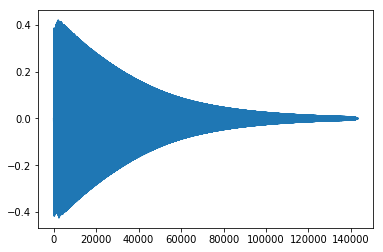

In [11]:
ipd.display(ipd.Audio(data=x,rate=fs))
plt.plot(x)

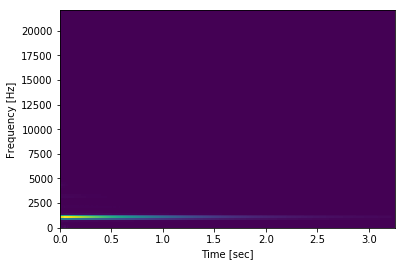

In [12]:
f,t,z = signal.stft(x, fs)
plt.pcolormesh(t, f, np.abs(z))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#### At the beginning, there is a metallic high frequency sound (probably from hitting the vibraphone) that decays over time.

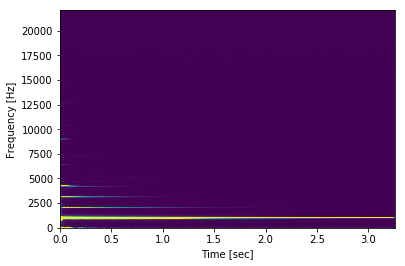

In [13]:
f,t,z = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(z),vmax=0.001)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [14]:
ipd.display(ipd.Audio(data=x[:7000],rate=fs))

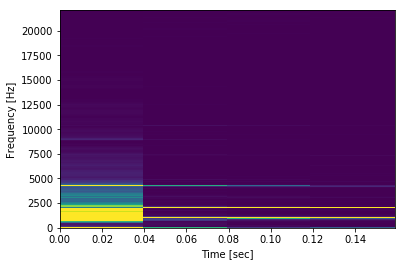

In [15]:
f,t,z = signal.stft(x[:7000], fs, nperseg=3500)
plt.pcolormesh(t, f, np.abs(z),vmax = 0.001)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

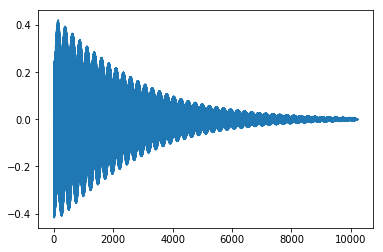

In [16]:
ipd.display(ipd.Audio(data=y,rate=fs_new))
plt.plot(y)

#### After downsampling, that part is distorted. Rest of the sound is fine.

In [17]:
ipd.display(ipd.Audio(data=y[:500],rate=fs_new))

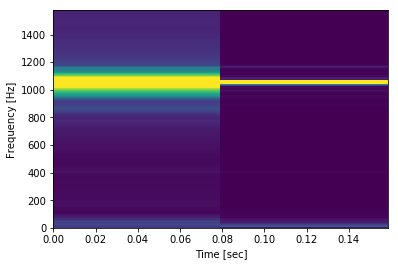

In [18]:
f,t,z = signal.stft(y[:500],fs_new,nperseg=500)
plt.pcolormesh(t, f, np.abs(z),vmax=0.01)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [19]:
# implement case 2
### your code here
x,fs,y,fs_new = down_sample_audio('../sounds/sawtooth-440.wav',14)

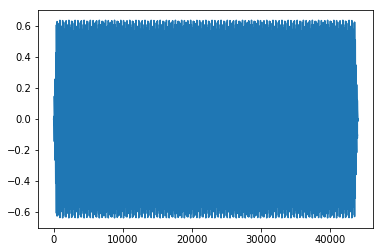

In [20]:
ipd.display(ipd.Audio(data=x,rate=fs))
plt.plot(x)

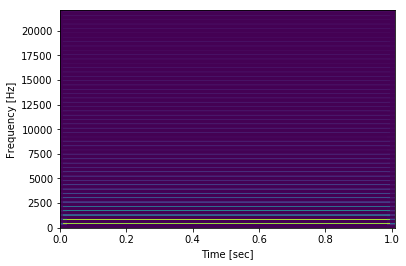

In [21]:
f,t,z = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(z),vmax=0.1)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

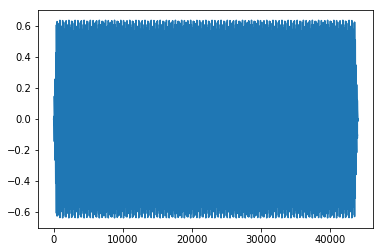

In [22]:
ipd.display(ipd.Audio(data=y,rate=fs_new))
plt.plot(x)

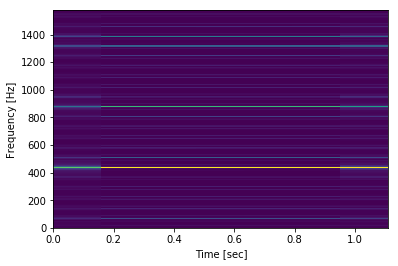

In [23]:
f,t,z = signal.stft(y,fs_new,nperseg=1000)
plt.pcolormesh(t, f, np.abs(z),vmax=0.1)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.figure(figsize=(25,10))
plt.show()

Aliases are visible in this figure.

## Your explanation for Part 4 here

 Downsampling did not affect the first sample much, except the beginning of it, but second sample has changed a lot. 

 Downsampled samples have 44100/14=3150 samples per second. Those samples have no components above 1575Hz due to Nyquist-Shannon theorem. Vibraphone sample has not effected because it is rougly a sinusoid with frequency ~1050Hz, less than 1575Hz. Sawtooth effected because it has a lot of high frequency components.

 Those frequency components higher than 1575Hz causes aliasing. Those frequencies are mapped to frequencies lower than nyquist frequency and they cause distortion. Second sample is a very good example for aliasing.



In [24]:
from scipy import fft, arange

Text(0,0.5,'magnitude')

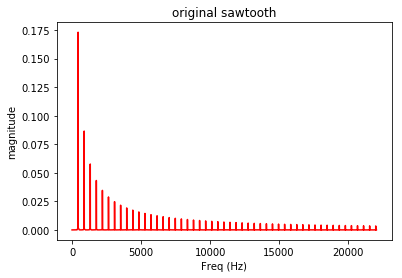

In [25]:
X = fft(x)/len(x)
k = arange(len(x)/2)*44100/len(x)
plt.plot(k,abs(X[:22050]),'r')
plt.title('original sawtooth')
plt.xlabel('Freq (Hz)')
plt.ylabel('magnitude')

Sawtooths fundamental frequency $f_o$ is 440Hz and its harmonics magnitudes are 
$$ X(f_k) = \frac{|X(f_o)|}{k}, k\epsilon Z^+$$

So magnitude at 4400Hz is one tenth of the 440Hz and so on.
We can see how those components reflected under 1575Hz and disturbed the sound.

Text(0,0.5,'magnitude')

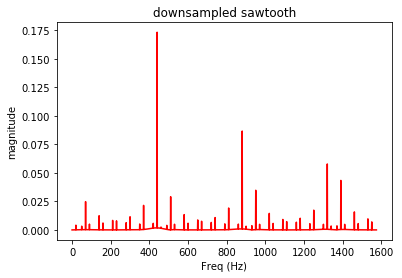

In [26]:
Y = fft(y)/len(y)
k = arange(len(y)/2)*3150/len(y)
plt.plot(k,abs(Y[:1575]),'r')
plt.title('downsampled sawtooth')
plt.xlabel('Freq (Hz)')
plt.ylabel('magnitude')

We can calculate it too. Look at the frequency just above the 3rd harmonic 1320Hz. It looks like 4rd harmonic at 1760Hz but reflected around 1400Hz.
$$cos(2\pi\frac{f_o}{f_s}n) = cos(\omega_on)$$
$$\omega_o=1760/3150 , \pi<\omega_o<2\pi$$
$$cos(\omega_on)=cos((2\pi-\omega_o)n),2\pi-\omega_o = 2\pi\frac{f_r}{f_s} $$
$$ .. f_r = 3150-1760 = 1390Hz$$


To avoid aliasing, we can use anti aliasing filter before downsampling. That will remove the frequency components above nyquist frequency.

In [27]:
from scipy import ifft
ideal_lpfilter = np.concatenate((np.ones(1575),np.zeros(44100-3150),np.ones(1575)))
Xaa=X*ideal_lpfilter

/home/srv/.local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


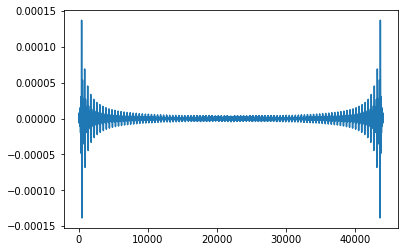

In [28]:
plt.plot(X)

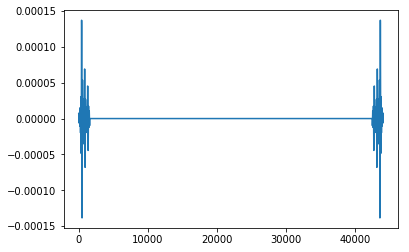

In [29]:
plt.plot(Xaa)

In [30]:
x_new = ifft(Xaa)

/home/srv/.local/lib/python3.6/site-packages/IPython/lib/display.py:124: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


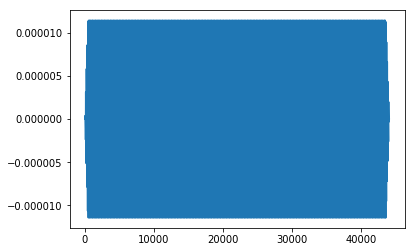

In [31]:
ipd.display(ipd.Audio(data=x_new,rate=fs)) # filtered sound ready to be downsampled
plt.plot(x_new)

In [32]:
y_new = hop_samples(x_new,14)

/home/srv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


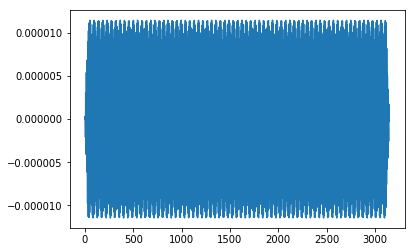

In [33]:
ipd.display(ipd.Audio(data=y_new,rate=fs_new)) # Downsampled sound after anti-aliasing
plt.plot(y_new)